# Data Resources
We get stock prices of Unilever Group from YahooFinance via a Python library called: yfinance.

After getting the data, save it to a csv for further analysis.

In [3]:
# imporrt libraries
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import mplfinance as mpf

In [4]:
# Retrieve Unilever's stock data
unilever = yf.Ticker("UL")
df = unilever.history(period="5y")


In [8]:
# Export Unilever stock data to CSV
path = "D:\\Thu Uyên\\Phân Tích Thống Kê\\project\\Unilever_stock_data.csv"
df.to_csv(path)


# Central Tendency Measures Calculation
Here we pay attention to daily close price of stock. Find out the mean, mode, median measures of the stock close price per year for the 5 closest years.

In [9]:
df['Close'].describe()
mean_close_price = df['Close'].mean()
med_close_price = df['Close'].median()

In [11]:

# Resample the data to monthly
stock_price_by_month = df.resample('M').agg({'Open': 'first', 
                                       'High': 'max', 
                                       'Low': 'min', 
                                       'Close': 'last', 
                                       'Volume': 'sum'})

# Prepare the data for mplfinance
stock_price_by_month.index = pd.to_datetime(stock_price_by_month.index)

C:\Users\HP\AppData\Local\Temp\ipykernel_2212\2406926523.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_price_by_month = df.resample('M').agg({'Open': 'first',


In [12]:
descriptive_stats = df.groupby(df.index.year)['Close'].mean()
descriptive_stats = descriptive_stats.to_frame()
descriptive_stats.columns = ['Mean Close Price']
descriptive_stats['Median Close Price'] = df.groupby(df.index.year)['Close'].median()
descriptive_stats['Mode Close Price'] = df.groupby(df.index.year)['Close'].agg(lambda x: x.value_counts().index[0])
descriptive_stats['Standard Deviation Close Price'] = df.groupby(df.index.year)['Close'].std()
descriptive_stats['Variance Close Price'] = df.groupby(df.index.year)['Close'].var()
descriptive_stats['Skewness Close Price'] = df.groupby(df.index.year)['Close'].skew()
descriptive_stats

,Mean Close Price,Median Close Price,Mode Close Price,Standard Deviation Close Price,Variance Close Price,Skewness Close Price
Date,,,,,,
2019,49.742744,50.028908,50.329239,1.146538,1.314550,-0.416509
2020,49.183751,50.510433,46.938030,3.790024,14.364280,-0.576193
2021,50.078044,49.780838,47.522434,2.269050,5.148587,0.225731
2022,43.574301,42.654346,44.425777,2.575564,6.633530,0.601181
2023,48.490558,48.148527,50.845352,1.800548,3.241973,0.481169
2024,54.861577,54.359529,53.709618,6.495882,42.196478,0.238522


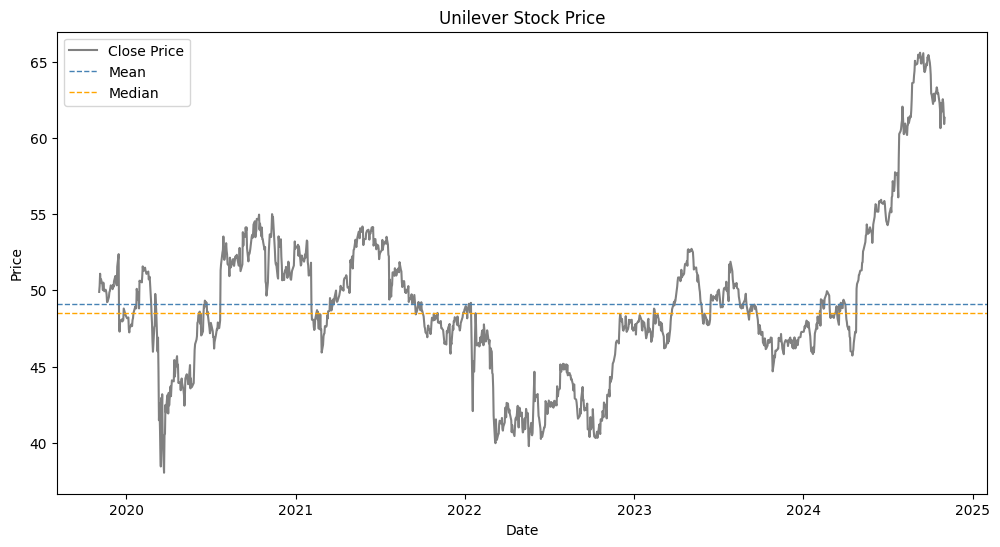

In [14]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='grey')
plt.axhline(y=mean_close_price, color='steelblue', linestyle='--', linewidth=1, label='Mean')
plt.axhline(y=med_close_price, color='orange', linestyle='--', linewidth=1, label='Median')
plt.title('Unilever Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**Đầu 2020** : có sự suy giảm đáng kể do  tác động của đại dịch COVID-19 
**Năm 2022:** 
-Giá cổ phiếu giảm do Unilever phải đối mặt với lạm phát chi phí đầu vào đáng kể, đặc biệt là do chiến tranh ở Ukraine, tác động đến thị trường và hàng hóa toàn cầu.(https://www.unilever.com/news/press-and-media/press-releases/2022/strong-execution-in-challenging-conditions/)
-Công ty đã bị giám sát chặt chẽ vì các quyết định chiến lược của mình, bao gồm cả việc đấu thầu không thành công với giá 68 tỷ đô la cho đơn vị chăm sóc sức khỏe người tiêu dùng của GSK, điều này làm dấy lên lo ngại về chiến lược tăng trưởng của công ty(https://www.euronews.com/2022/01/20/gsk-m-a-unilever-stocks)
**Năm 2023-2024**: phục hồi và tăng trưởng.
-Dưới sự lãnh đạo của Tổng giám đốc điều hành Hein Schumacher, Unilever đã triển khai chiến lược chuyển mình tập trung vào các thương hiệu hàng đầu, mang lại lợi nhuận cao hơn trong nửa đầu năm 2024.(https://www.thetimes.com/business-money/companies/article/unilever-hails-progress-in-turnaround-efforts-pw7pntx8h?utm_source=chatgpt.com&region=global)
-Unilever công bố kế hoạch tách riêng bộ phận kem, bao gồm các thương hiệu như Ben & Jerry's, vào cuối năm 2025. Động thái này dự kiến ​​sẽ cho phép Unilever tập trung vào các danh mục có tốc độ tăng trưởng nhanh hơn, biên lợi nhuận cao hơn, nâng cao triển vọng lợi nhuận và tăng trưởng(https://www.marketwatch.com/story/removing-ben-jerrys-distraction-allows-for-unilever-double-upgrade-bank-of-america-says-9280bcfd?utm_source=chatgpt.com)



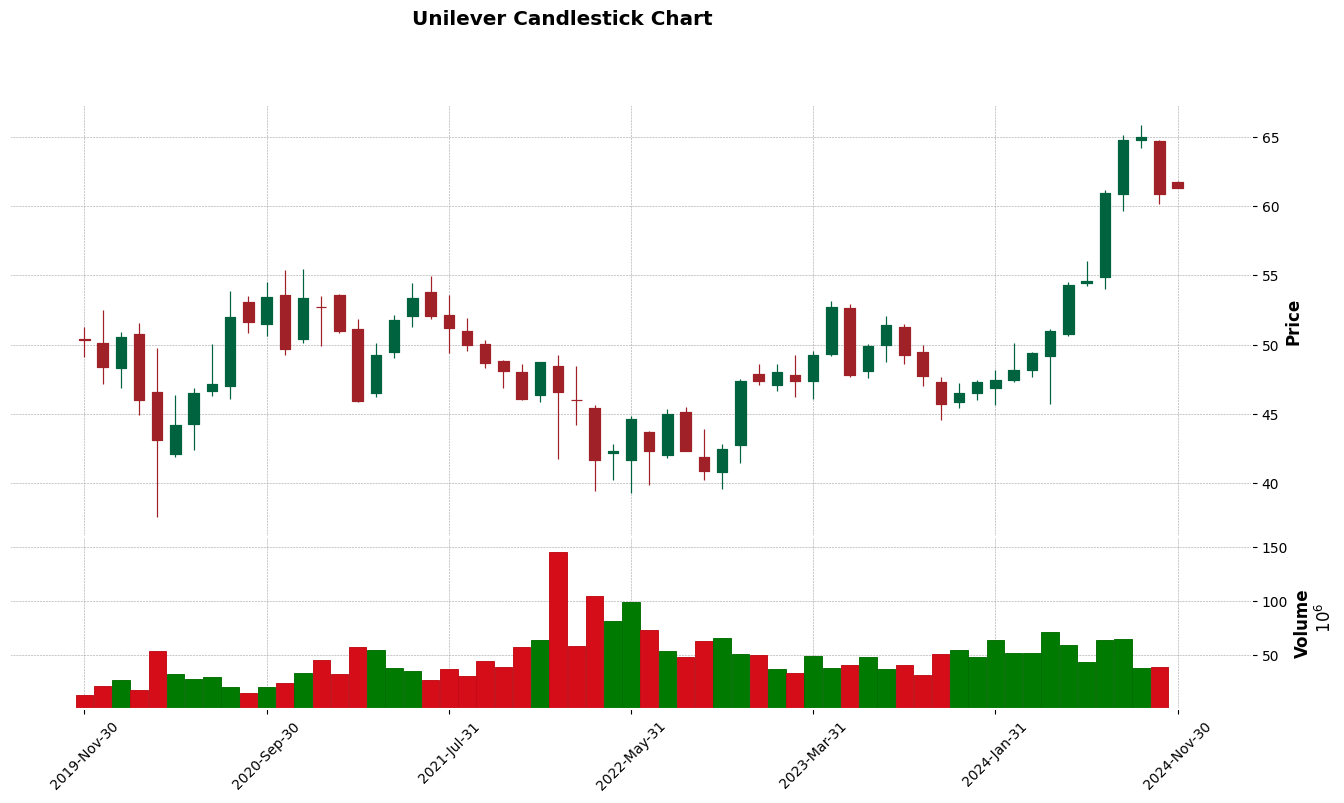

In [15]:
mpf.plot(stock_price_by_month, type='candle', volume=True, title='Unilever Candlestick Chart', ylabel='Price', ylabel_lower='Volume', style='charles', figratio=(12, 6), figscale=1.5)

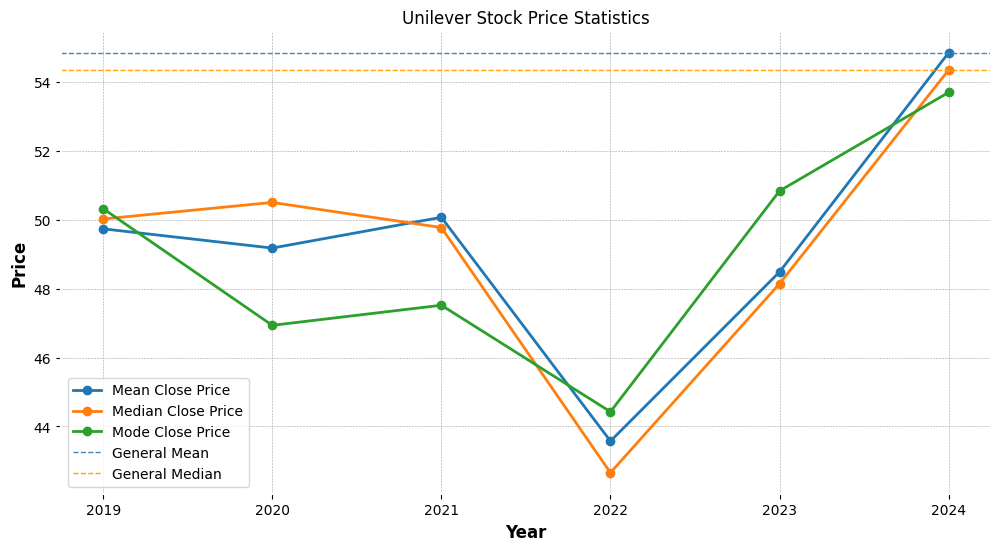

In [20]:
plt.figure(figsize=(12, 6))

# Plot each statistic
plt.plot(descriptive_stats.index, descriptive_stats['Mean Close Price'], label='Mean Close Price', marker='o')
plt.plot(descriptive_stats.index, descriptive_stats['Median Close Price'], label='Median Close Price', marker='o')
plt.plot(descriptive_stats.index, descriptive_stats['Mode Close Price'], label='Mode Close Price', marker='o')

# Draw horizontal lines for general mean and median (using the last available year’s statistics as examples)
plt.axhline(y=descriptive_stats['Mean Close Price'].iloc[-1], color='steelblue', linestyle='--', linewidth=1, label='General Mean')
plt.axhline(y=descriptive_stats['Median Close Price'].iloc[-1], color='orange', linestyle='--', linewidth=1, label='General Median')

# Set labels and title
plt.title("Unilever Stock Price Statistics")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()
